In [86]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
ds_bc = pd.read_csv('./Downloads/week4day1/FITNESS.csv',encoding='CP949',engine='python')
ds_bc.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [4]:
ds_fitness.isnull()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [5]:
ds_fitness.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [6]:
ds_fitness["GENDER"].fillna("여성", inplace=True)
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [7]:
ds_fitness.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [8]:
ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean").head()

0    72.908750
1    72.908750
2    72.908750
3    72.908750
4    82.433077
Name: WEIGHT, dtype: float64

In [9]:
ds_fitness["WEIGHT"]=ds_fitness["WEIGHT"].fillna(ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [10]:
ds_fitness_char=ds_fitness.select_dtypes(include="object")
ds_fitness_numeric=ds_fitness.select_dtypes(exclude="object")
ds_fitness_char

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대
5,Allen,남성,30대
6,Nancy,여성,40대
7,Patty,여성,50대
8,Suzanne,여성,50대
9,Teresa,여성,50대


In [11]:
ds_fitness_numeric

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185
5,38,89.020,49.874,9.22,178,55,180
6,49,76.320,48.673,9.40,186,56,188
7,52,76.320,45.441,9.63,164,48,166
8,57,59.080,50.545,9.93,148,49,155
9,51,77.910,46.672,10.00,162,48,168


In [12]:
ds_scale=scale(ds_fitness_numeric)
ds_scale=pd.DataFrame(ds_scale,columns=ds_fitness_numeric.columns)
ds_scale.head()
ds_scale_describe=ds_scale.describe()
ds_scale_describe.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.707,-2.240,-1.906,-1.770,-2.345,-0.951,-2.083
25%,-0.666,-0.524,-0.460,-0.591,-0.659,-0.495,-0.641
50%,0.201,-0.008,-0.115,-0.085,0.035,-0.210,-0.197
75%,0.722,0.618,0.526,0.501,0.630,0.218,0.691
max,1.763,1.714,2.419,2.523,1.622,4.981,2.022


In [96]:
ds_minmax_scale=minmax_scale(ds_fitness_numeric)
ds_minmax_scale=pd.DataFrame(ds_minmax_scale,columns=ds_fitness_numeric.columns)
ds_minmax_scale.head()

ds_minmax_scale.describe=ds_minmax_scale.describe()
ds_minmax_scale.describe.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [14]:
ds_robust_scale=robust_scale(ds_fitness_numeric)
ds_robust_scale=pd.DataFrame(ds_robust_scale, columns=ds_fitness_numeric.columns)
ds_robust_scale.head()

ds_robust_scale.describe=ds_robust_scale.describe()
ds_robust_scale.describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,-0.145,0.007,0.116,0.078,-0.027,0.294,0.148
std,0.733,0.890,1.031,0.931,0.789,1.426,0.764
min,-1.375,-1.953,-1.817,-1.544,-1.846,-1.040,-1.417
25%,-0.625,-0.452,-0.350,-0.463,-0.538,-0.400,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.375,0.548,0.650,0.537,0.462,0.600,0.667
max,1.125,1.507,2.571,2.389,1.231,7.280,1.667


In [15]:
ds_rstpulse=pd.DataFrame()
ds_rstpulse["Raw"]=ds_fitness["RSTPULSE"]
ds_rstpulse["Scale"]=ds_scale["RSTPULSE"]
ds_rstpulse["Robust"]=ds_robust_scale["RSTPULSE"]
ds_rstpulse["MinMax"]=ds_minmax_scale["RSTPULSE"]
ds_rstpulse.round(3)

,Raw,Scale,Robust,MinMax
0,40,-0.951,-1.04,0.000
1,48,-0.495,-0.40,0.077
2,45,-0.666,-0.64,0.048
3,48,-0.495,-0.40,0.077
4,44,-0.723,-0.72,0.038
5,55,-0.096,0.16,0.144
6,56,-0.039,0.24,0.154
7,48,-0.495,-0.40,0.077
8,49,-0.438,-0.32,0.087
9,48,-0.495,-0.40,0.077


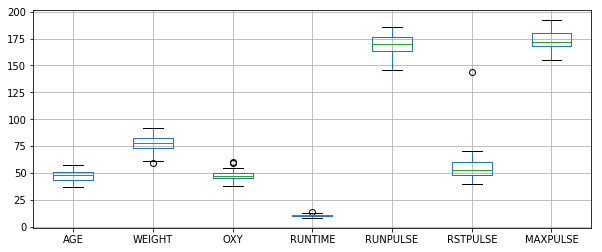

In [16]:
ds_fitness.boxplot(figsize=(10,4))

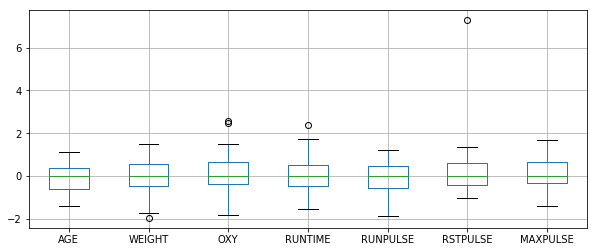

In [17]:
ds_robust_scale.boxplot(figsize=(10,4))

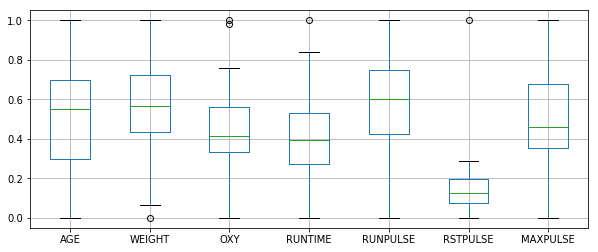

In [18]:
ds_minmax_scale.boxplot(figsize=(10,4))

In [19]:
ds_fitness["RSTPULSE"]>=100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [20]:
ds_fitness=ds_fitness[ds_fitness["RSTPULSE"]<100]
ds_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


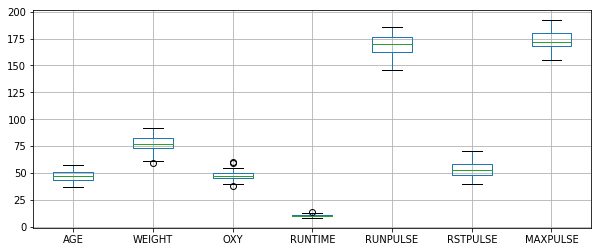

In [21]:
ds_fitness.boxplot(figsize=(10,4))

In [27]:
ds_currency=pd.read_csv('./Downloads/week4day1/환율.csv',encoding='CP949',engine='python',parse_dates=["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


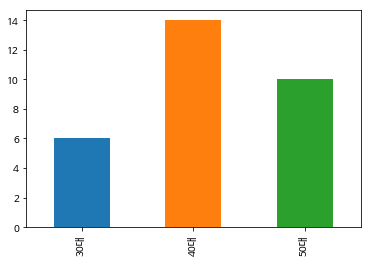

In [32]:
ds_agg=ds_fitness["AGEGROUP"].value_counts()
ds_agg.sort_index(inplace=True)
ds_agg.plot.bar()
#40대의 데이터가 가장 많다.

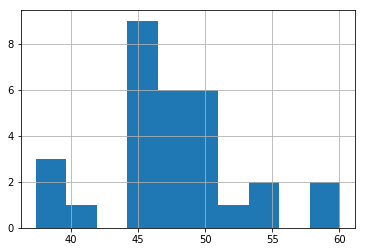

In [23]:
ds_fitness["OXY"].hist()
#45~50의 OXY가 가장 많다

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d00db978>,
      dtype=object)

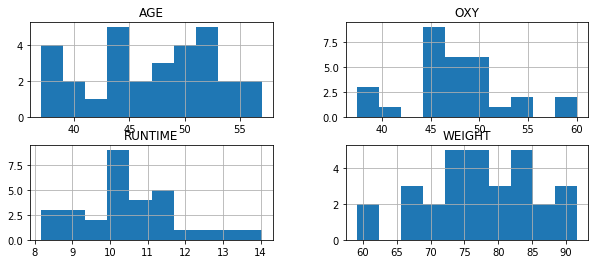

In [25]:
ds_fitness[["WEIGHT","AGE","OXY","RUNTIME"]].hist(figsize=(10,4))
#나이의 분포는 45세, 50세 초반이 가장 많고, 대체로 50세 부근의 data가 많으며 40세 초반이 가장 적다.
#런타임은 주로 10~11이 많고 12 이후로는 소수
#무게는 70초반에서 85까지가 많다.

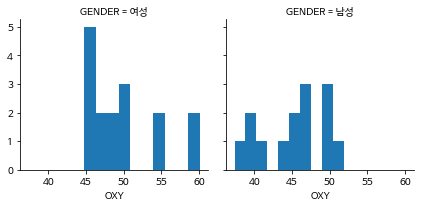

In [38]:
grid=sns.FacetGrid(ds_fitness, col="GENDER")
grid.map(plt.hist,"OXY")
#여성은 주로 45~50구간을 형성
#남성은 여성보다 주로 낮으며, 40~50에서 주로 구간 형성

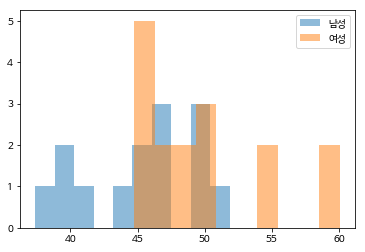

In [34]:
plt.hist(ds_fitness[ds_fitness["GENDER"]=="남성"]["OXY"],label="남성",alpha=0.5)
plt.hist(ds_fitness[ds_fitness["GENDER"]=="여성"]["OXY"],label="여성",alpha=0.5)
plt.legend()
#남성이 비교적 더 낮은 것을 확인

(array([3., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

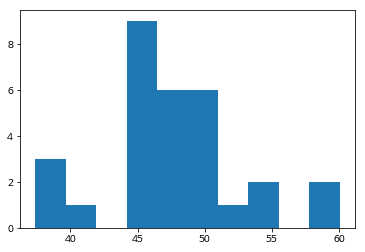

In [40]:
plt.hist(x="OXY",data=ds_fitness)
#디폴트 빈이 10개
#데이터 섬이 3개 존재하고 45~50이 주로 분포

(array([1., 2., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

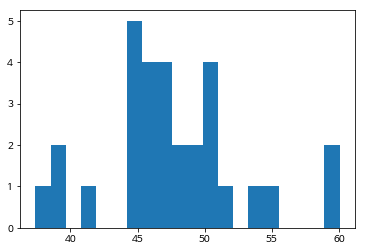

In [39]:
plt.hist(x="OXY",data=ds_fitness,bins=20)
#빈의 갯수가 커지며 더 정확한 분포
#데이터 섬이 일부 존재하고, 대부분의 경우 45~50부근에서 형성

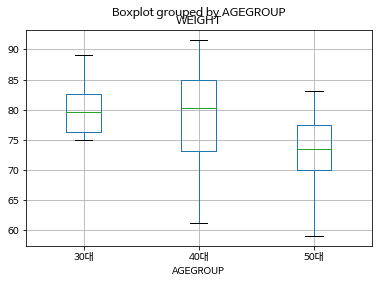

In [41]:
ds_fitness.boxplot(column="WEIGHT", by="AGEGROUP")
#40대의 몸무게 중앙값이 가장 높고, 분포가 가장 넓다
#50대가 몸무게 중앙값이 가장 낮고, 최소값도 가장 낮다


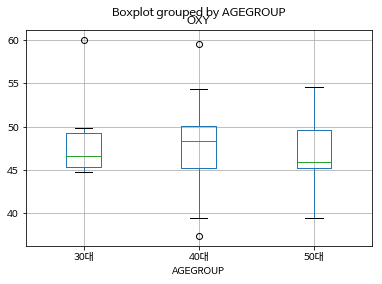

In [44]:
ds_fitness.boxplot(column="OXY", by="AGEGROUP")
#40대의 OXY 중앙값이 가장 높다
#30대의 분포가 가장 고르다.

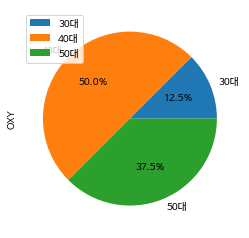

In [42]:
ds_sub=ds_fitness[ds_fitness["OXY"]>=50]
ds_count=ds_sub.groupby("AGEGROUP", as_index=False).agg("count")
ds_count.plot.pie(y="OXY", labels=ds_count["AGEGROUP"], autopct="%.1f%%")
#40대의 OXY>=50인 data가 가장 많다 

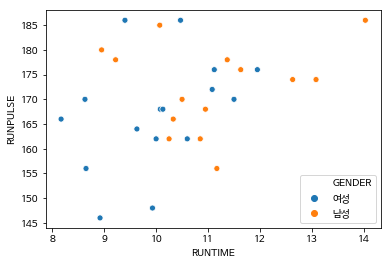

In [43]:
sns.scatterplot(x="RUNTIME",y="RUNPULSE",hue="GENDER",data=ds_fitness)
#여성보다는 남성에게서 약한 양의 상관관계가 의심된다.

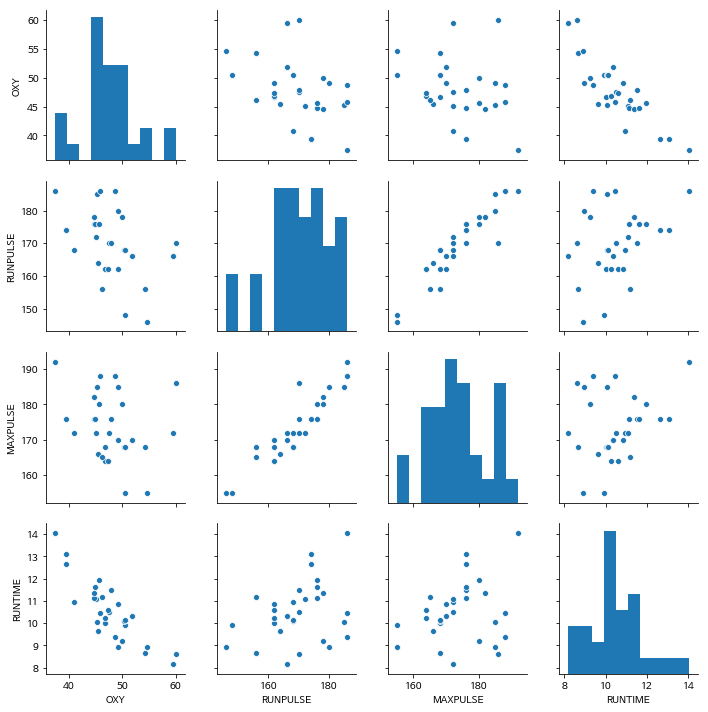

In [49]:
ds_filter=ds_fitness.filter(["OXY","RUNPULSE","MAXPULSE","RUNTIME"])
sns.pairplot(ds_filter)
#OXY와 RUNTIME의 강한 음의 상관관계가 나타난다
#MAXPULSE와 RUNPULSE의 강한 양의 상관관계가 나타난다
#RUNTIME-MAXPULSE와 RUNTIME-RUNPULSE에서 약한 양의 상관관계가 나타난다
#목표변수인 OXY를 맨 앞으로

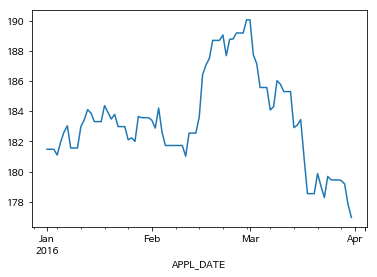

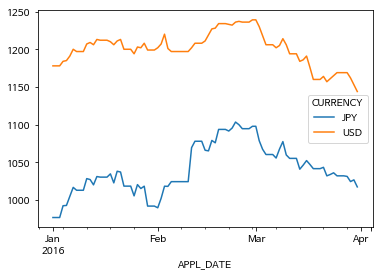

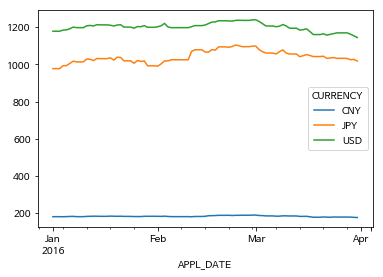

In [61]:
ds_currency_pivot=ds_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
ds_currency_pivot["CNY"].plot()
ds_currency_pivot[["JPY","USD"]].plot()
ds_currency_pivot[["CNY","JPY","USD"]].plot()
#위안화 환율이 1월에서 2월 초까지는 박스 이동을 하다가
#2월에서 소폭 하강후 3월초까지 계속 상승하며 고점을 찍고, 4월까지 계속 하강
#위안화,엔화,달러화 모두 환율 변동이 비슷한 패턴을 보인다
#엔화 환율은 위안화 만큼은 아니지만 달러보다는 2월에서 급상승

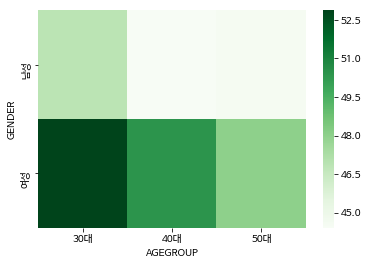

In [66]:
ds_agg=ds_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("mean")
ds_pivot=ds_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(ds_pivot,cmap="Greens")
#30대 여성의 OXY가 가장 높은 편이고, 남자이고, 늙을수록 OXY가 떨어지는 경향이 있다

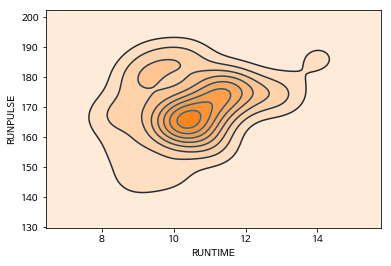

In [63]:
sns.kdeplot(ds_fitness["RUNTIME"],ds_fitness["RUNPULSE"],shade=False)
#RUNPULSE는 170부근, RUNTIME은 10부근에 모여있다

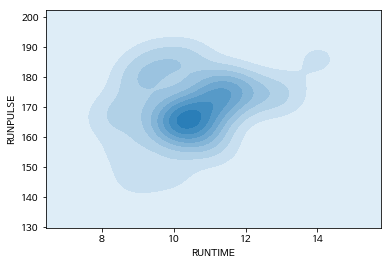

In [64]:
sns.kdeplot(ds_fitness["RUNTIME"],ds_fitness["RUNPULSE"],shade=True)

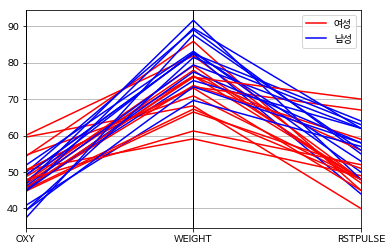

In [81]:
ds_filter=ds_fitness[["GENDER","OXY","WEIGHT","RSTPULSE"]]


pd.plotting.parallel_coordinates(ds_filter,"GENDER",color=("RED","BLUE"))
#OXY에서 남성이 여성보다 대체로 낮고
#WEIGHT에서는 남성이 여성보다 대체로 높고
#RSTPULSE에서는 일부 여성이 남성보다 높은 경우도 있으나 대체로 여성이 남성보다는 낮다.

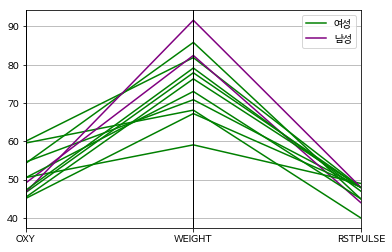

In [84]:
ds_filter2=ds_filter[ds_filter["RSTPULSE"]<50]
pd.plotting.parallel_coordinates(ds_filter2,"GENDER",color=("GREEN","PURPLE"))

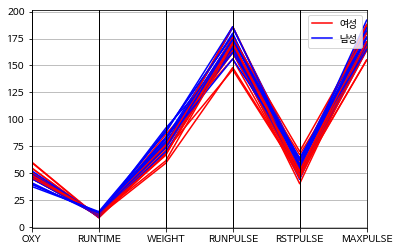

In [75]:
ds_filter=ds_fitness[["GENDER","OXY","RUNTIME","WEIGHT","RUNPULSE", "RSTPULSE","MAXPULSE"]]
pd.plotting.parallel_coordinates(ds_filter,"GENDER",color=("RED","BLUE"))
#OXY에서 남성이 여성보다 대체로 낮고
#WEIGHT에서는 남성이 여성보다 대체로 높고
#RSTPULSE에서는 일부 여성이 남성보다 높은 경우도 있으나 대체로 여성이 남성보다는 낮다.

Text(486.9227272727271, 0.5, '혈당 산소 요구량')

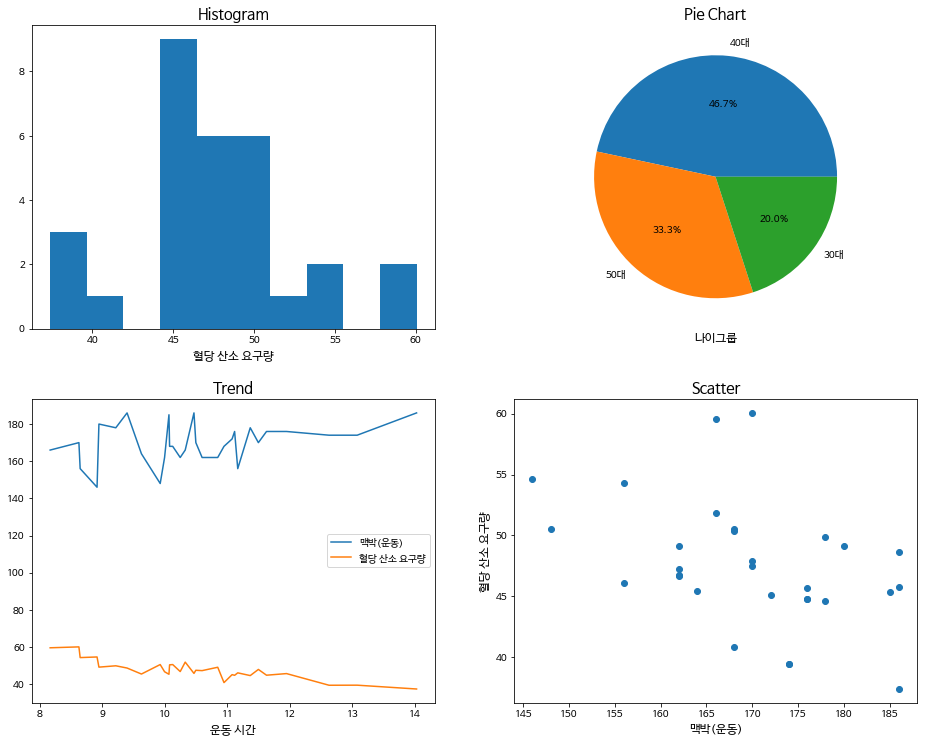

In [72]:
ds_count=ds_fitness["AGEGROUP"].value_counts()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)
#Histogram
axes[0,0].hist(ds_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)
#Pie Chart
axes[0,1].pie(ds_count,labels=ds_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("Pie Chart",fontsize=15)
axes[0,1].set_xlabel("나이그룹",fontsize=12)
#Trend
axes[1,0].plot("RUNTIME","RUNPULSE",data=ds_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data=ds_fitness,label="혈당 산소 요구량")
axes[1,0].set_title("Trend",fontsize=15)
axes[1,0].set_xlabel("운동 시간",fontsize=12)
axes[1,0].legend()
#Scatter
axes[1,1].scatter("RUNPULSE","OXY",data=ds_fitness)
axes[1,1].set_title("Scatter",fontsize=15)
axes[1,1].set_xlabel("맥박(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량",fontsize=12)
#RUNTIME이 증가하면 OXY가 감소해 깊은 연관이 있는 것으로 보여진다
#약한 음의 상관관계가 관찰


In [88]:
ds_repair=pd.read_csv('./Downloads/week4day1/부품수리시간.csv',encoding='CP949',engine='python')
ds_repair.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


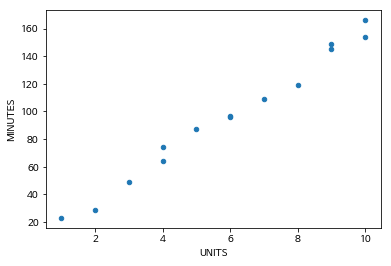

In [89]:
ds_repair.plot.scatter(x="UNITS", y="MINUTES")
ds_repair.corr(method="pearson").round(3)
#UNITS와 MINUTES가 매우 강한 양의 상관관계를 보임

In [93]:
ds_repair_x=ds_repair["UNITS"]
ds_repair_y=ds_repair["MINUTES"]
ds_repair_x_const=sm.add_constant(ds_repair_x)
reg_model=sm.OLS(ds_repair_y,ds_repair_x_const)
reg_results=reg_model.fit()
print(reg_results.summary())
#관측치가 14개, 잔차의 자유도 12, 모델의 자유도 1
#F값은 943으로 매우크다. 모델의 설명력이 매우 높음.p값은 0에 가까움
#R^2이 0.987로 매우 설명력이 높은 모델
#회귀계수에서 상수의 p값은 0.239로 높지만, 상수항의 경우 무시
#UNITS의 계수의 p값이 0으로 유의
#따라서 Y=4.167+15.5088*UNITS 라고 회귀식 도출

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        17:41:25   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,const,UNITS
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,6
8,1.0,7
9,1.0,8


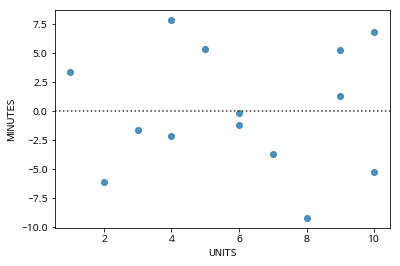

In [95]:
sns.residplot(ds_repair_x,ds_repair_y)
#잔차가 등분산성을 보인다

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-1.75219161, -1.40175329, -1.05131497, -0.70087664, -0.70087664,
         -0.35043832,  0.        ,  0.        ,  0.35043832,  0.70087664,
          1.05131497,  1.05131497,  1.40175329,  1.40175329])),
 (1.0930552327010123, 3.172065784643304e-17, 0.9843861971111748))

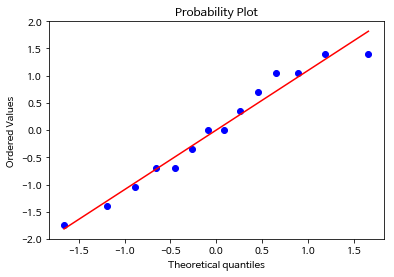

In [92]:
obs=ds_repair_x.values
z=(obs-np.mean(obs))/np.std(obs)
stats.probplot(z,dist="norm",plot=plt)
#잔차가 강한 정규성을 띈다